In [1]:
import os
import mlflow

os.environ["MLFLOW_TRACKING_USERNAME"] = "admin"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "password"


In [2]:

mlflow.set_tracking_uri("https://mlflow.ml.brain.cs.ait.ac.th/")
mlflow.set_experiment("st125982-a3")

<Experiment: artifact_location='mlflow-artifacts:/543723791259908050', creation_time=1759569430911, experiment_id='543723791259908050', last_update_time=1759569430911, lifecycle_stage='active', name='st125982-a3', tags={'mlflow.experimentKind': 'custom_model_development'}>

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [4]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('2.1.3', '2.2.3', '0.13.2', '3.10.0')

In [5]:
df = pd.read_csv('./data/Cars.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [6]:
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [7]:
df.shape

(8128, 13)

In [8]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [10]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [11]:
# renaming all columns to work with naming conventions easily
df.rename(columns = {
    'name': 'name', 
    'year': 'year',
    'selling_price': 'sell_price', 
    'km_driven': 'km', 
    'fuel': 'fuel', 
    'seller_type': 'sell_type',
    'transmission': 'transmission', 
    'owner': 'owner', 
    'mileage': 'mileage', 
    'engine': 'engine', 
    'max_power': 'max_power', 
    'torque': 'torque',
    'seats': 'seats'
}, inplace=True)

df.columns

Index(['name', 'year', 'sell_price', 'km', 'fuel', 'sell_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats'],
      dtype='object')

In [12]:
# printing only owner column from dataframe
df['owner']

0                First Owner
1               Second Owner
2                Third Owner
3                First Owner
4                First Owner
                ...         
8123             First Owner
8124    Fourth & Above Owner
8125             First Owner
8126             First Owner
8127             First Owner
Name: owner, Length: 8128, dtype: object

In [13]:
#printing unique names of owner column without repeatation
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [14]:
# replacing string with numeric value to predict 
df['owner'] = df['owner'].replace({
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
})

In [15]:
# checking dataframe
df

,name,year,sell_price,km,fuel,sell_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [16]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [17]:
# deleting rows with name LPG 
df = df[df['fuel'] != 'LPG']
df['fuel']

0       Diesel
1       Diesel
2       Petrol
3       Diesel
4       Petrol
         ...  
8123    Petrol
8124    Diesel
8125    Diesel
8126    Diesel
8127    Diesel
Name: fuel, Length: 8090, dtype: object

In [18]:
df['fuel'].unique()


array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [19]:
df = df[df['fuel'] != 'CNG']
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [20]:
df.head(3)

,name,year,sell_price,km,fuel,sell_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0


In [21]:
df['mileage']

0        23.4 kmpl
1       21.14 kmpl
2        17.7 kmpl
3        23.0 kmpl
4        16.1 kmpl
           ...    
8123     18.5 kmpl
8124     16.8 kmpl
8125     19.3 kmpl
8126    23.57 kmpl
8127    23.57 kmpl
Name: mileage, Length: 8033, dtype: object

In [22]:
# spliting string and taking first index of the splited string 
df['mileage'] = df['mileage'].str.split(' ').str[0]
df['mileage']

0        23.4
1       21.14
2        17.7
3        23.0
4        16.1
        ...  
8123     18.5
8124     16.8
8125     19.3
8126    23.57
8127    23.57
Name: mileage, Length: 8033, dtype: object

In [23]:
# checking data type of mileage column
df['mileage'].dtype


dtype('O')

In [24]:
# changing mileage column from object to float
df['mileage'] = df['mileage'].astype(float)
df['mileage'].dtype

dtype('float64')

In [25]:
df['engine']

0       1248 CC
1       1498 CC
2       1497 CC
3       1396 CC
4       1298 CC
         ...   
8123    1197 CC
8124    1493 CC
8125    1248 CC
8126    1396 CC
8127    1396 CC
Name: engine, Length: 8033, dtype: object

In [26]:
df['engine'] = df['engine'].str.split(' ').str[0]
df['engine']

0       1248
1       1498
2       1497
3       1396
4       1298
        ... 
8123    1197
8124    1493
8125    1248
8126    1396
8127    1396
Name: engine, Length: 8033, dtype: object

In [27]:
df['engine'] = df['engine'].astype(float)   # changing data type of engine from object to float

In [28]:
df.head(3)

,name,year,sell_price,km,fuel,sell_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0


In [29]:
df['max_power'] =  df['max_power'].str.split(' ').str[0]
df['max_power']

0           74
1       103.52
2           78
3           90
4         88.2
         ...  
8123     82.85
8124       110
8125      73.9
8126        70
8127        70
Name: max_power, Length: 8033, dtype: object

In [30]:
df['max_power'] = df['max_power'].astype(float)

In [31]:
df['max_power'].dtype


dtype('float64')

In [32]:
df['name'] = df['name'].str.split(' ').str[0]   #splitting and taking first index 0 as to get only brand names
df['name']

0        Maruti
1         Skoda
2         Honda
3       Hyundai
4        Maruti
         ...   
8123    Hyundai
8124    Hyundai
8125     Maruti
8126       Tata
8127       Tata
Name: name, Length: 8033, dtype: object

In [33]:
df.rename(columns={'name':'brand'}, inplace=True)   # changing naming convention from name to brand # inplace True to change main data set
df.head()

,brand,year,sell_price,km,fuel,sell_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [34]:
df.drop(columns=['torque'], inplace=True) # dropping column torque from dataframe 
df.head()

,brand,year,sell_price,km,fuel,sell_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [35]:
df['owner'].unique()


array([1, 2, 3, 4, 5])

In [36]:
df['owner'].dtype

dtype('int64')

In [37]:
df = df[df['owner'] != 5]   # deleting row of owner column with integer 5
df['owner']

0       1
1       2
2       3
3       1
4       1
       ..
8123    1
8124    4
8125    1
8126    1
8127    1
Name: owner, Length: 8028, dtype: int64

In [38]:
df['owner'].unique()

array([1, 2, 3, 4])

In [39]:
df['sell_price']

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: sell_price, Length: 8028, dtype: int64

<Axes: xlabel='fuel', ylabel='count'>

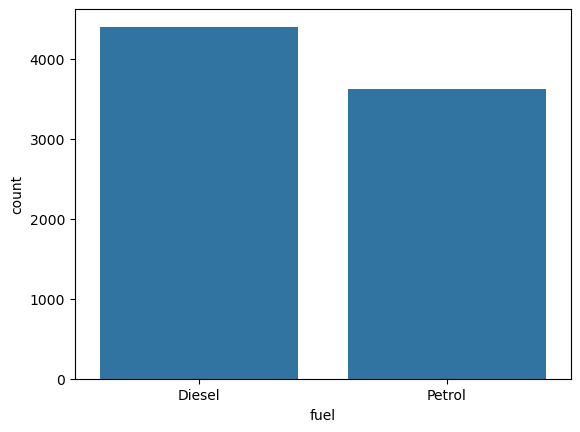

In [40]:
# checking count of the dataframe fuel column using seaborn countplot
sns.countplot(data = df, x = 'fuel')

<Axes: xlabel='transmission', ylabel='count'>

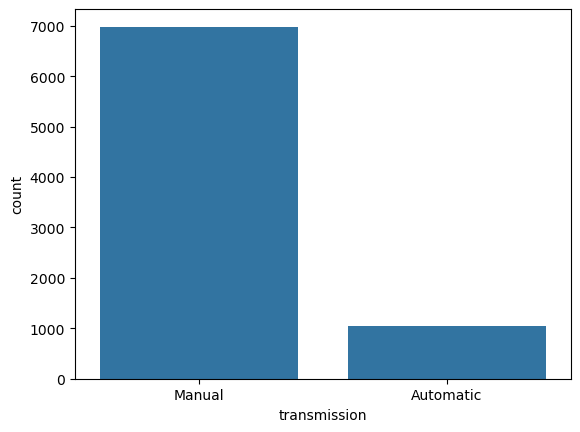

In [41]:
sns.countplot(data = df, x = 'transmission')


Text(0.5, 0, 'Fuel')

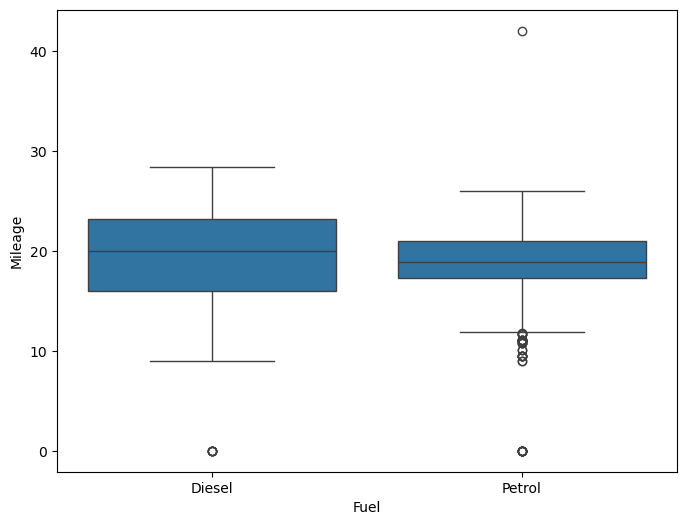

In [42]:
# providing figure size to display
plt.figure(figsize=(8,6))
sns.boxplot(x = df['fuel'], y= df['mileage'])   # displaying fuel and mileage column in boxplot 
plt.ylabel('Mileage')
plt.xlabel('Fuel')

<Axes: xlabel='seats', ylabel='count'>

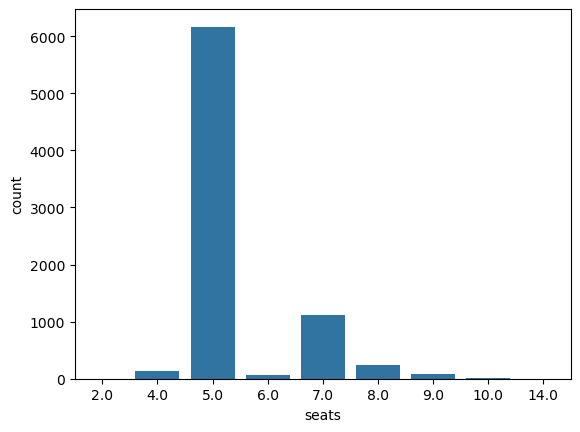

In [43]:
sns.countplot(data = df, x = 'seats')

<Axes: xlabel='owner', ylabel='count'>

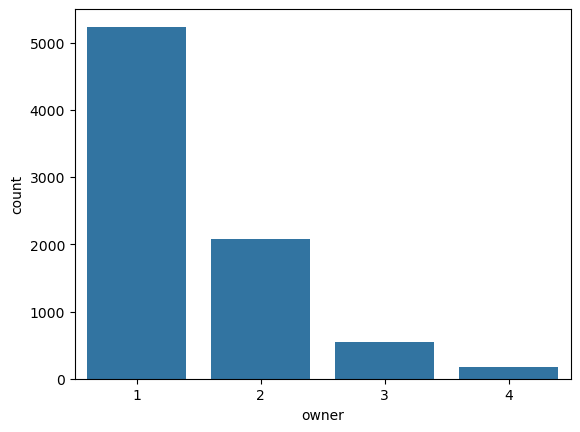

In [44]:
sns.countplot(data = df, x = 'owner')

In [45]:
# plt.style.use('ggplot')
# sns.set_palette("viridis")


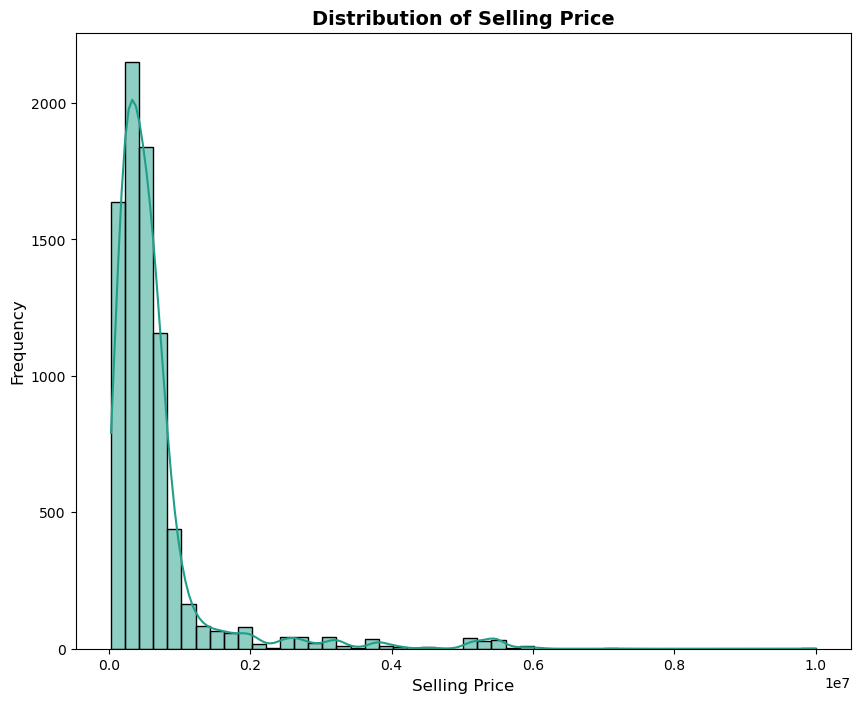

In [46]:

plt.figure(figsize=(10, 8))
sns.histplot(
    df['sell_price'],
    bins=50,
    kde=True,
    color=sns.color_palette("viridis", 8)[4]
)
plt.title("Distribution of Selling Price", fontsize=14, weight='bold')
plt.xlabel("Selling Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


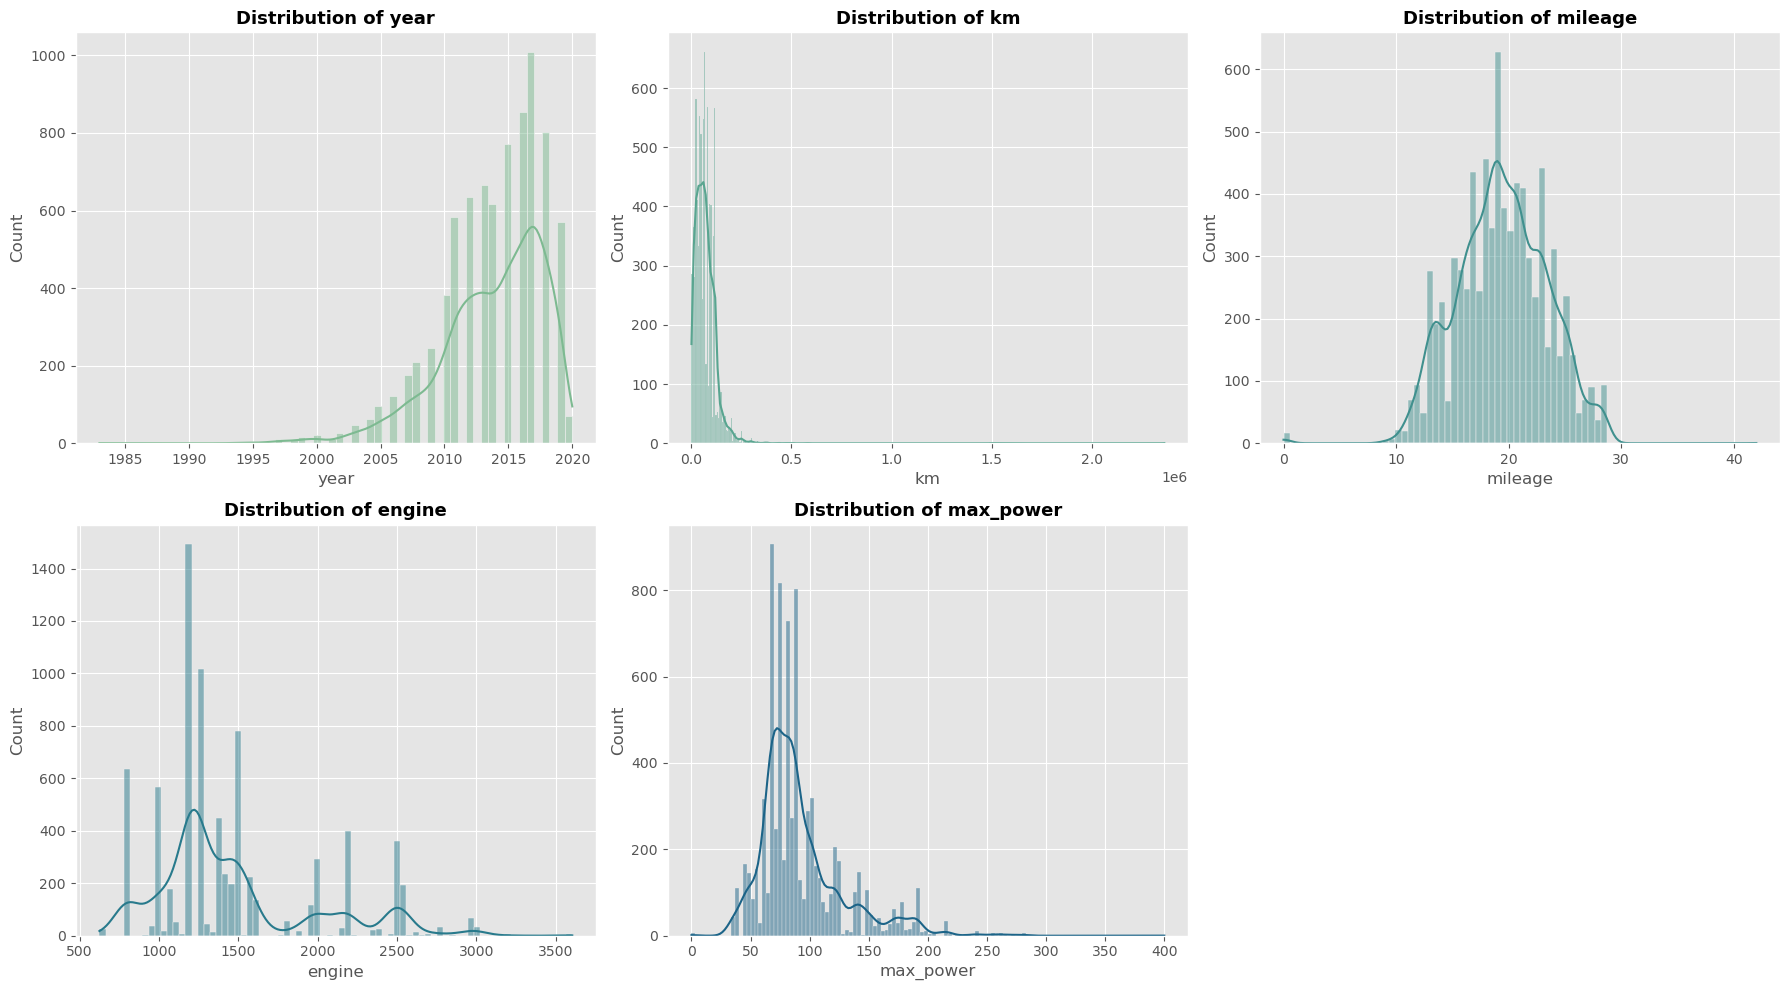

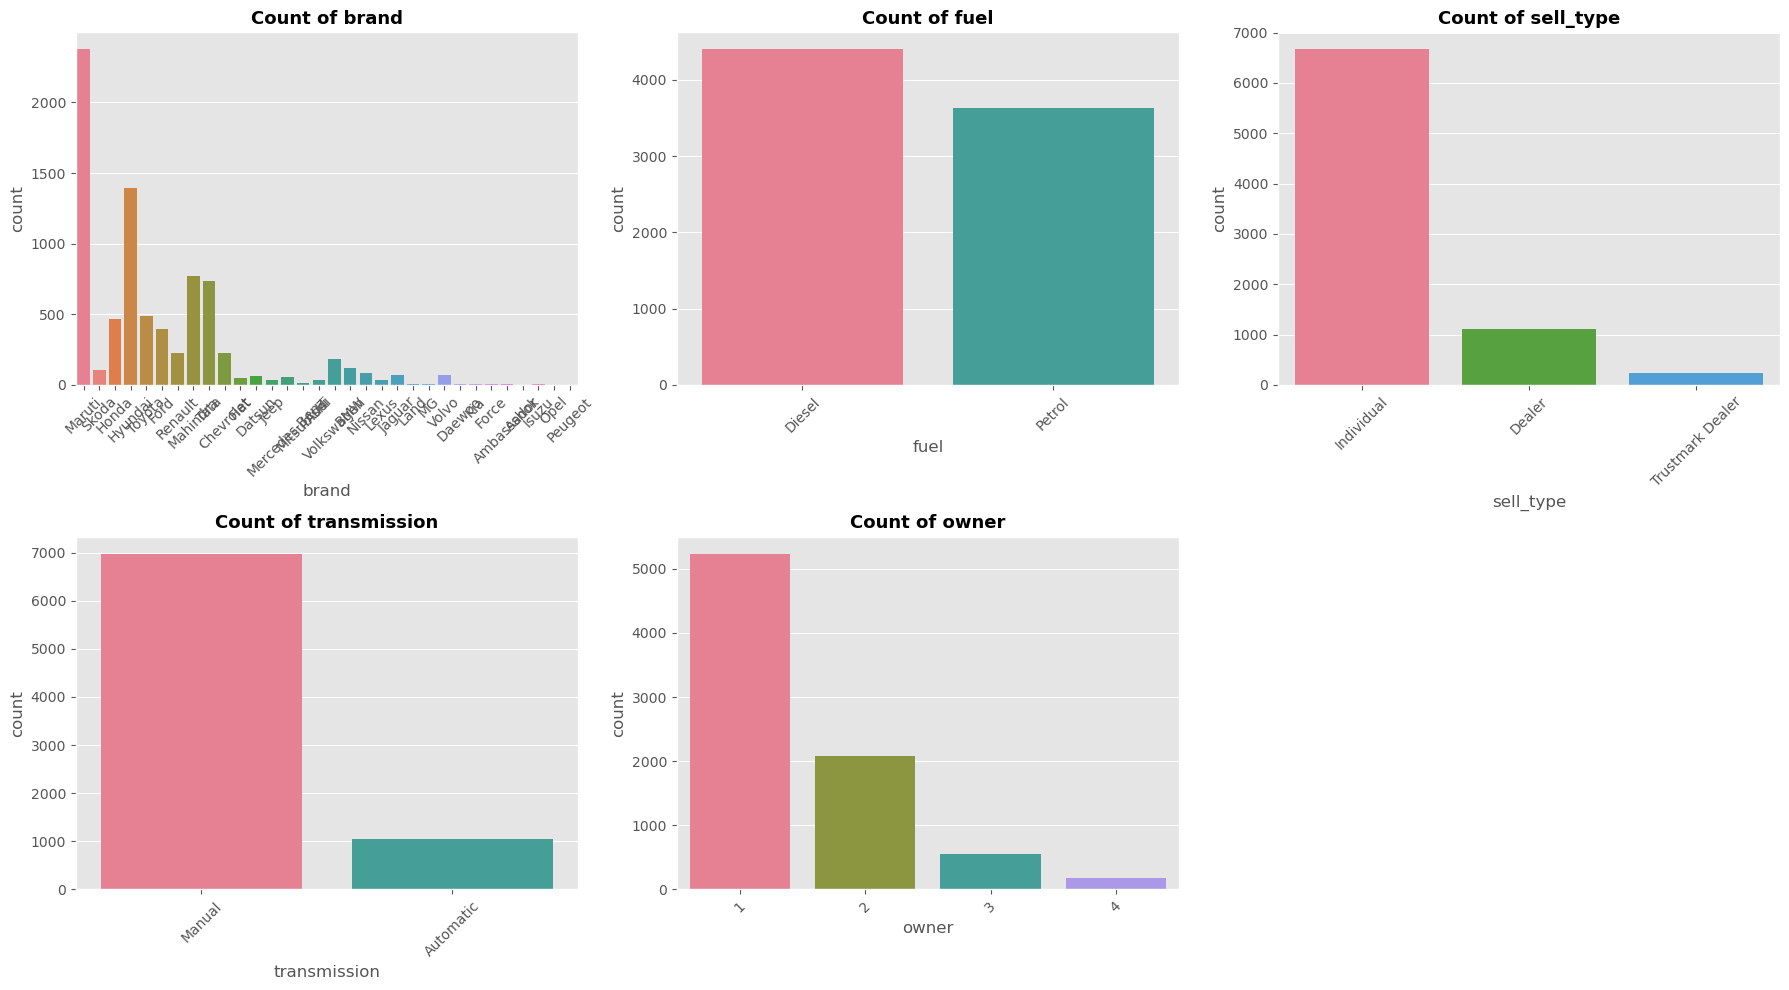

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['year', 'km', 'mileage', 'engine', 'max_power']  # numerical columns
cat_cols = ['brand', 'fuel', 'sell_type', 'transmission', 'owner']  # categorical columns

plt.style.use('ggplot')
sns.set_palette("crest")

# Numerical columns
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, color=sns.color_palette("crest", 6)[i], ax=axes[i])
    axes[i].set_title(f"Distribution of {col}", fontsize=13, weight='bold')

# Hide unused axes if grid > number of columns
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Categorical columns
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(cat_cols):
    sns.countplot(x=df[col], palette="husl", ax=axes[i])
    axes[i].set_title(f"Count of {col}", fontsize=13, weight='bold')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [48]:
df.head(3)

,brand,year,sell_price,km,fuel,sell_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0


In [49]:
print(df['fuel'].unique())
print(df['transmission'].unique())
print(df['brand'].unique())


['Diesel' 'Petrol']
['Manual' 'Automatic']
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot']


In [50]:
from sklearn.preprocessing import LabelEncoder
# import joblib # import pickle to save trained model and use easily when necessary 

# le = LabelEncoder()

# df['fuel'] = le.fit_transform(df['fuel'])
# print("Fuel mapping:", dict(zip(le.classes_, le.transform(le.classes_))))   # change data to numeric array [0,1,2,3] in ascending order a-z and then showing which array shows which string data for clarification

# df['transmission'] = le.fit_transform(df['transmission'])
# print("Transmission mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# df['sell_type'] = le.fit_transform(df['sell_type'])
# print("Sell Type mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# df['brand'] = le.fit_transform(df['brand'])
# print("Brand mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


# Dictionary to hold encoders
label_encoders = {}

categorical_cols = [
    'fuel', 
    'transmission', 
    'sell_type', 
    'brand', 
    ]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [51]:
print(df['fuel'].unique())  
print(df['transmission'].unique())  
print(df['sell_type'].unique())
print(df['brand'].unique())

[0 1]
[1 0]
[1 0 2]
[20 27 10 11 29  9 26 19 28  4  7  6 14 21 22  2 30  3 23 17 13 16 18 31
  5 15  8  0  1 12 24 25]


<Axes: >

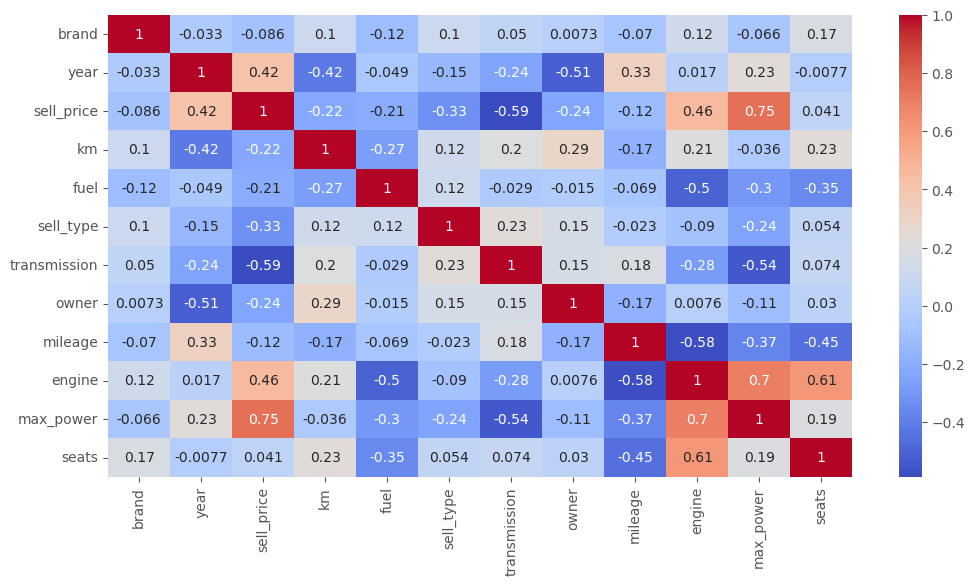

In [52]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm") # used heatmap to see correlation and drop unnecessary column # closer to 1 better

In [53]:
df = df.drop(columns=['seats', 'transmission','sell_type'])  # dropped columns after correlation using correlation sns heatmap
df.columns

Index(['brand', 'year', 'sell_price', 'km', 'fuel', 'owner', 'mileage',
       'engine', 'max_power'],
      dtype='object')

<Axes: >

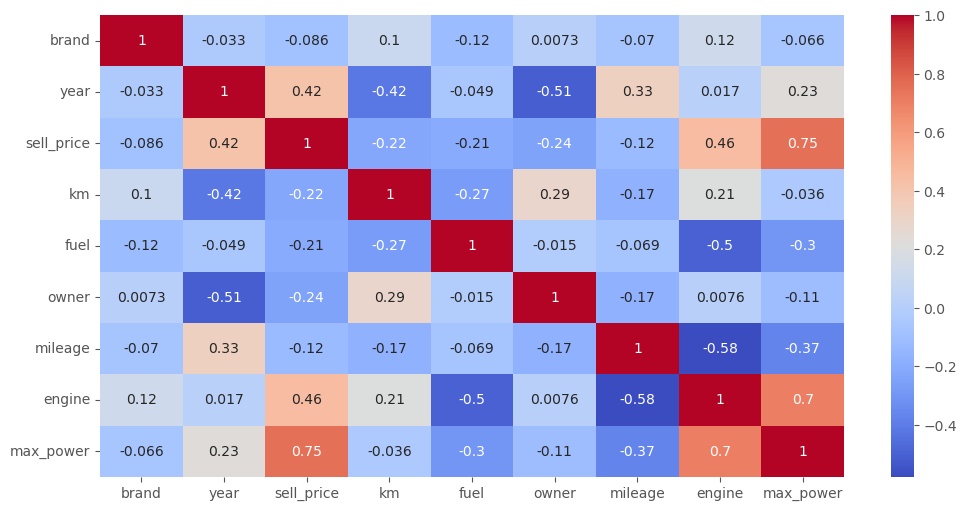

In [54]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm") 

In [55]:
df = df.drop(columns=['owner'])
df.columns

Index(['brand', 'year', 'sell_price', 'km', 'fuel', 'mileage', 'engine',
       'max_power'],
      dtype='object')

<Axes: >

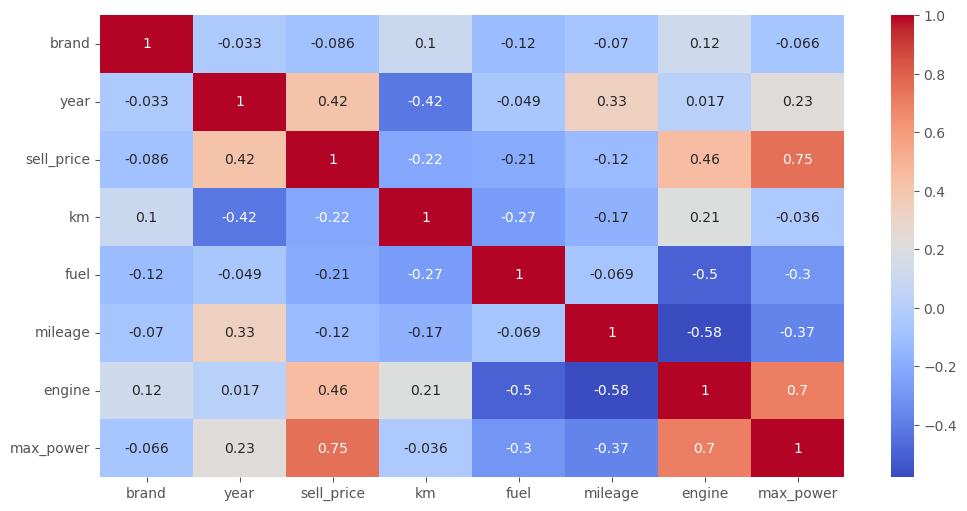

In [56]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm") 

In [57]:
df = df.drop(columns=['km','fuel','mileage'])
df.columns

Index(['brand', 'year', 'sell_price', 'engine', 'max_power'], dtype='object')

<Axes: >

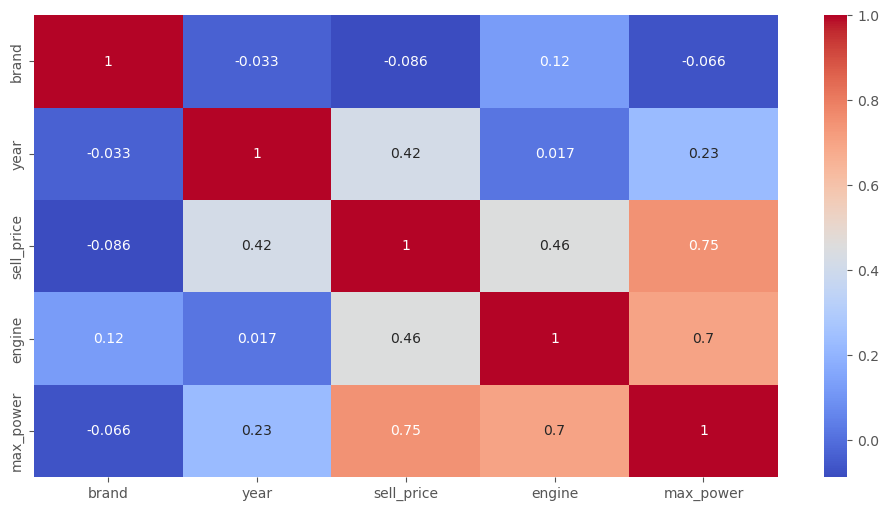

In [58]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm") 

In [59]:
df.head()

,brand,year,sell_price,engine,max_power
0,20,2014,450000,1248.0,74.00
1,27,2014,370000,1498.0,103.52
2,10,2006,158000,1497.0,78.00
3,11,2010,225000,1396.0,90.00
4,20,2007,130000,1298.0,88.20


In [60]:
# Feature Engineering
# df['price_class'] = pd.qcut(
#     df['sell_price'],
#     q=4,
#     labels=[0, 1, 2, 3],
#     include_lowest=True
# ).astype(int)

X = df[['brand','year', 'engine','max_power']]
y = df['sell_price']

print(df['sell_price'].value_counts())


sell_price
300000     219
600000     213
350000     207
550000     204
450000     192
          ... 
803999       1
430999       1
2175000      1
778000       1
92000        1
Name: count, Length: 667, dtype: int64


In [61]:
# Feature Engineering
y = pd.qcut(y, q=4, labels=[0,1,2,3])

# bin_mapping = pd.DataFrame({
#     "class": [0, 1, 2, 3],
#     "price_range": y_class.cat.categories
# })
# print(bin_mapping)

# df['price_class'] = y_class
# df['price_range'] = df['price_class'].map(lambda x: bin_mapping.loc[bin_mapping['class'] == x, 'price_range'].values[0])

# X = df[['brand','year', 'engine','max_power']]  # Features/Label/X/Predictor
# y = df['sell_price']    # y/Target
df.head()

,brand,year,sell_price,engine,max_power
0,20,2014,450000,1248.0,74.00
1,27,2014,370000,1498.0,103.52
2,10,2006,158000,1497.0,78.00
3,11,2010,225000,1396.0,90.00
4,20,2007,130000,1298.0,88.20


In [62]:
y.value_counts()

sell_price
0    2050
1    2044
3    1991
2    1943
Name: count, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2, random_state= 42)

In [64]:
# Preprocessing
# Checking if value is null
X_train[['brand','year', 'engine','max_power']].isna().sum()

brand          0
year           0
engine       171
max_power    165
dtype: int64

In [65]:
y_train.isna().sum()

np.int64(0)

In [66]:
X_test.isna().sum()


brand         0
year          0
engine       43
max_power    43
dtype: int64

In [67]:
# since many values are null we are adding median to missing values
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)

X_test['engine'].fillna(X_test['engine'].median(), inplace=True)
X_test['max_power'].fillna(X_test['max_power'].median(), inplace=True)


In [68]:
X_train[['brand','year', 'engine','max_power']].isna().sum()

brand        0
year         0
engine       0
max_power    0
dtype: int64

In [69]:
X_test[['brand','year', 'engine','max_power']].isna().sum()

brand        0
year         0
engine       0
max_power    0
dtype: int64

In [70]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [71]:
# calling outlier function to count outliers
for col in X_train.columns:
    outlier_count(col)


---------------year---------------

Number of outliers: 63
Percent of data that is outlier: 0.98%

---------------engine---------------

Number of outliers: 960
Percent of data that is outlier: 14.95%

---------------max_power---------------

Number of outliers: 459
Percent of data that is outlier: 7.15%


In [72]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 4)
Shape of X_test:  (1606, 4)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


In [73]:
import time 

### Logistic Regression Class

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import time

class LogisticRegression:
    def __init__(self, k, n, lr=0.001, max_iter=1000, l2_penalty=False, lambda_=0.01, momentum=0.9):
        self.k = k          # number of classes
        self.n = n          # number of features
        self.lr = lr
        self.max_iter = max_iter
        self.l2_penalty = l2_penalty
        self.lambda_ = lambda_
        self.momentum = momentum

    def _xavier_init(self):
        limit = np.sqrt(6 / (self.n + self.k))
        W = np.random.uniform(-limit, limit, size=(self.n, self.k))
        b = np.zeros((1, self.k))
        return W, b

    def softmax(self, Z):
        Z = np.array(Z, dtype=float)
        Z = Z - np.max(Z, axis=1, keepdims=True)  # stability trick
        expZ = np.exp(Z)
        return expZ / np.sum(expZ, axis=1, keepdims=True)

    def _predict(self, X):
        return self.softmax(np.dot(X, self.W) + self.b)

    def predict(self, X_test):
        return np.argmax(self._predict(X_test), axis=1)

    def gradient(self, X, Y):
        X = np.array(X, dtype=float)
        Y = np.array(Y, dtype=float)
        m = X.shape[0]

        H = self._predict(X)
        loss = -np.sum(Y * np.log(H + 1e-9)) / m

        grad_W = np.dot(X.T, (H - Y)) / m
        grad_b = np.sum(H - Y, axis=0, keepdims=True) / m

        if self.l2_penalty:
            grad_W += (self.lambda_ / m) * self.W
            loss += (self.lambda_ / (2*m)) * np.sum(self.W**2)

        return loss, grad_W, grad_b

    def fit(self, X, Y):
        X = np.array(X, dtype=float)
        Y = np.array(Y, dtype=float)

        # Xavier initialization
        self.W, self.b = self._xavier_init()
        self.losses = []

        # Initialize velocities
        vW = np.zeros_like(self.W)
        vb = np.zeros_like(self.b)

        start_time = time.time()
        for i in range(self.max_iter):
            # Full batch gradient descent
            loss, grad_W, grad_b = self.gradient(X, Y)

            # Momentum update
            vW = self.momentum * vW - self.lr * grad_W
            vb = self.momentum * vb - self.lr * grad_b

            self.W += vW
            self.b += vb

            if i % 100 == 0:
                self.losses.append(loss)
                print(f"Loss at iteration {i}: {loss}")

        print(f"Time taken: {time.time() - start_time:.2f} seconds")

    def plot(self):
        plt.figure(figsize=(8,5))
        plt.plot(np.arange(len(self.losses))*100, self.losses, label="Train losses")
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        plt.title("Training Loss over Iterations")
        plt.legend()
        plt.show()

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [76]:
# converting y to one-hot encoding because model uses Softmax and need one-hot vectors
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
Y_train_onehot = ohe.fit_transform(y_train.values.reshape(-1,1))
Y_test_onehot = ohe.transform(y_test.values.reshape(-1,1))


In [77]:
# training to LogisticRegression class
# model = LogisticRegression(k=4, n=X_train_scaled.shape[1], method="batch", alpha=0.001, max_iter=1000)
k = len(np.unique(y))
model = LogisticRegression(k=k, n=X_train_scaled.shape[1], lr=0.1, max_iter=1000, l2_penalty=True, lambda_=0.1) #initializing the model
model.fit(X_train_scaled, Y_train_onehot)

Loss at iteration 0: 1.6105647034433843
Loss at iteration 100: 0.7365068789662595
Loss at iteration 200: 0.7296159232102727
Loss at iteration 300: 0.7284021462617689
Loss at iteration 400: 0.7281311397699519
Loss at iteration 500: 0.7280644553821274
Loss at iteration 600: 0.7280470306944705
Loss at iteration 700: 0.7280422024494663
Loss at iteration 800: 0.7280407512799087
Loss at iteration 900: 0.7280402570270265
Time taken: 1.14 seconds


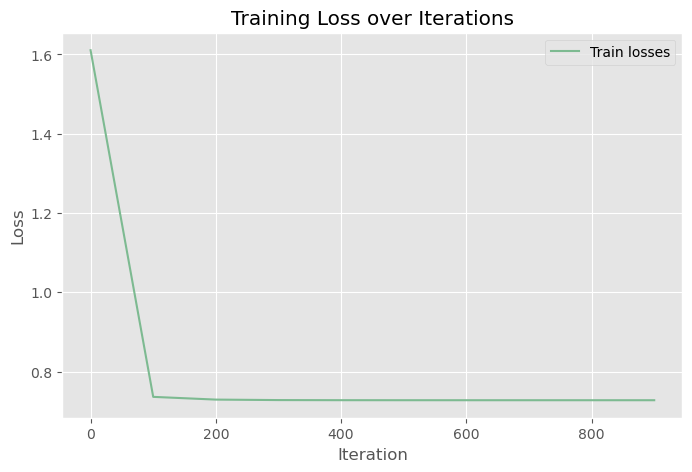

In [78]:
model.plot()



In [79]:
yhat = model.predict(X_test_scaled)

In [80]:
from sklearn.metrics import classification_report
# In classification report: Support means number of true instances of each class in the dataset
# supportc​=number of samples where ytrue​=c
print(classification_report(y_test, yhat)) 

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       411
           1       0.66      0.57      0.61       456
           2       0.50      0.63      0.56       352
           3       0.81      0.71      0.76       387

    accuracy                           0.69      1606
   macro avg       0.69      0.69      0.69      1606
weighted avg       0.70      0.69      0.69      1606



## Creating Custom Classification Report

In [81]:
import numpy as np

# ---------- helpers ----------
def _prep_labels(y_true, y_pred, labels=None):
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()
    if labels is None:
        labels = np.unique(np.concatenate([y_true, y_pred]))
    idx = {lbl: i for i, lbl in enumerate(labels)}
    return y_true, y_pred, labels, idx

def confusion_matrix(y_true, y_pred, labels=None):
    y_true, y_pred, labels, idx = _prep_labels(y_true, y_pred, labels)
    cm = np.zeros((len(labels), len(labels)), dtype=int)  # rows=true, cols=pred
    for t, p in zip(y_true, y_pred):
        cm[idx[t], idx[p]] += 1
    return cm, labels

def _tp_fp_fn_tn(cm):
    tp = np.diag(cm).astype(float)
    fp = cm.sum(axis=0) - tp
    fn = cm.sum(axis=1) - tp
    tn = cm.sum() - (tp + fp + fn)
    return tp, fp, fn, tn

# ---------- metrics ----------
def accuracy(y_true, y_pred):
    """correct / all"""
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()
    return (y_true == y_pred).mean()

def precision_recall_f1_per_class(y_true, y_pred, labels=None, zero_division=0.0):
    """
    For each class c:
      precision_c = TP_c / (TP_c + FP_c)
      recall_c    = TP_c / (TP_c + FN_c)
      f1_c        = 2 * precision_c * recall_c / (precision_c + recall_c)
    """
    cm, labels = confusion_matrix(y_true, y_pred, labels)
    tp, fp, fn, _ = _tp_fp_fn_tn(cm)

    with np.errstate(divide='ignore', invalid='ignore'):
        prec = np.divide(tp, tp + fp,
                         out=np.full_like(tp, zero_division, dtype=float),
                         where=(tp + fp) != 0)
        rec  = np.divide(tp, tp + fn,
                         out=np.full_like(tp, zero_division, dtype=float),
                         where=(tp + fn) != 0)
        f1   = np.divide(2 * prec * rec, (prec + rec),
                         out=np.zeros_like(tp, dtype=float),
                         where=(prec + rec) != 0)

    support = cm.sum(axis=1) #support = number of true instances per class.
    return {"labels": labels, "precision": prec, "recall": rec, "f1": f1,
            "support": support, "cm": cm}

def classification_report_scratch(y_true, y_pred, labels=None, zero_division=0.0, digits=2):
    """Text report similar to sklearn's classification_report."""
    res = precision_recall_f1_per_class(y_true, y_pred, labels, zero_division)
    labels = res["labels"]; p = res["precision"]; r = res["recall"]; f1 = res["f1"]; s = res["support"]
    total = s.sum()
    acc = accuracy(y_true, y_pred)

    macro = np.array([p.mean(), r.mean(), f1.mean()])
    weighted = np.array([(p*s).sum()/total, (r*s).sum()/total, (f1*s).sum()/total])

    lines = [f"{'class':>12} {'precision':>10} {'recall':>10} {'f1-score':>10} {'support':>10}"]
    for lbl, pi, ri, fi, si in zip(labels, p, r, f1, s):
        lines.append(f"{str(lbl):>12} {pi:10.{digits}f} {ri:10.{digits}f} {fi:10.{digits}f} {int(si):10d}")
    lines.append(f"{'accuracy':>12} {'':>10} {'':>10} {acc:10.{digits}f} {int(total):10d}")
    lines.append(f"{'macro avg':>12} {macro[0]:10.{digits}f} {macro[1]:10.{digits}f} {macro[2]:10.{digits}f} {int(total):10d}")
    lines.append(f"{'weighted avg':>12} {weighted[0]:10.{digits}f} {weighted[1]:10.{digits}f} {weighted[2]:10.{digits}f} {int(total):10d}")
    return "\n".join(lines)
print(classification_report_scratch(y_test, yhat)) 

       class  precision     recall   f1-score    support
           0       0.81       0.84       0.82        411
           1       0.66       0.57       0.61        456
           2       0.50       0.63       0.56        352
           3       0.81       0.71       0.76        387
    accuracy                             0.69       1606
   macro avg       0.69       0.69       0.69       1606
weighted avg       0.70       0.69       0.69       1606


In [82]:
import numpy as np

# ---- scratch confusion matrix (renamed) ----
def confusion_matrix_scratch(y_true, y_pred, labels=None):
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()
    if labels is None:
        labels = np.unique(np.concatenate([y_true, y_pred]))
    idx = {lbl: i for i, lbl in enumerate(labels)}
    cm = np.zeros((len(labels), len(labels)), dtype=int)  # rows=true, cols=pred
    for t, p in zip(y_true, y_pred):
        cm[idx[t], idx[p]] += 1
    return cm, labels

def _tp_fp_fn_tn(cm):
    tp = np.diag(cm).astype(float)
    fp = cm.sum(axis=0) - tp
    fn = cm.sum(axis=1) - tp
    tn = cm.sum() - (tp + fp + fn)
    return tp, fp, fn, tn

def accuracy(y_true, y_pred):
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()
    return (y_true == y_pred).mean()

def precision_recall_f1_per_class(y_true, y_pred, labels=None, zero_division=0.0):
    # *** call our scratch CM, not sklearn's ***
    cm, labels = confusion_matrix_scratch(y_true, y_pred, labels)
    tp, fp, fn, _ = _tp_fp_fn_tn(cm)

    with np.errstate(divide='ignore', invalid='ignore'):
        prec = np.divide(tp, tp + fp,
                         out=np.full_like(tp, zero_division, dtype=float),
                         where=(tp + fp) != 0)
        rec  = np.divide(tp, tp + fn,
                         out=np.full_like(tp, zero_division, dtype=float),
                         where=(tp + fn) != 0)
        f1   = np.divide(2 * prec * rec, (prec + rec),
                         out=np.zeros_like(tp, dtype=float),
                         where=(prec + rec) != 0)
    support = cm.sum(axis=1)
    return {"labels": labels, "precision": prec, "recall": rec, "f1": f1,
            "support": support, "cm": cm}

def classification_report_scratch(y_true, y_pred, labels=None, zero_division=0.0, digits=2):
    res = precision_recall_f1_per_class(y_true, y_pred, labels, zero_division)
    labels = res["labels"]; p = res["precision"]; r = res["recall"]; f1 = res["f1"]; s = res["support"]
    total = s.sum()
    acc = accuracy(y_true, y_pred)

    macro = np.array([p.mean(), r.mean(), f1.mean()])
    w = s / total if total > 0 else np.zeros_like(s, float)
    weighted = np.array([(p*w).sum(), (r*w).sum(), (f1*w).sum()])

    lines = [f"{'class':>12} {'precision':>10} {'recall':>10} {'f1-score':>10} {'support':>10}"]
    for lbl, pi, ri, fi, si in zip(labels, p, r, f1, s):
        lines.append(f"{str(lbl):>12} {pi:10.{digits}f} {ri:10.{digits}f} {fi:10.{digits}f} {int(si):10d}")
    lines.append(f"{'accuracy':>12} {'':>10} {'':>10} {acc:10.{digits}f} {int(total):10d}")
    lines.append(f"{'macro avg':>12} {macro[0]:10.{digits}f} {macro[1]:10.{digits}f} {macro[2]:10.{digits}f} {int(total):10d}")
    lines.append(f"{'weighted avg':>12} {weighted[0]:10.{digits}f} {weighted[1]:10.{digits}f} {weighted[2]:10.{digits}f} {int(total):10d}")
    return "\n".join(lines)


In [83]:
import numpy as np

def macro_precision(y_true, y_pred, labels=None, zero_division=0.0):
    res = precision_recall_f1_per_class(y_true, y_pred, labels, zero_division)
    return float(np.mean(res["precision"]))

def macro_recall(y_true, y_pred, labels=None, zero_division=0.0):
    res = precision_recall_f1_per_class(y_true, y_pred, labels, zero_division)
    return float(np.mean(res["recall"]))

def macro_f1(y_true, y_pred, labels=None, zero_division=0.0):
    res = precision_recall_f1_per_class(y_true, y_pred, labels, zero_division)
    return float(np.mean(res["f1"]))

def weighted_precision(y_true, y_pred, labels=None, zero_division=0.0):
    res = precision_recall_f1_per_class(y_true, y_pred, labels, zero_division)
    s = res["support"].astype(float)
    w = s / s.sum() if s.sum() > 0 else np.zeros_like(s, dtype=float)
    return float(np.sum(res["precision"] * w))

def weighted_recall(y_true, y_pred, labels=None, zero_division=0.0):
    res = precision_recall_f1_per_class(y_true, y_pred, labels, zero_division)
    s = res["support"].astype(float)
    w = s / s.sum() if s.sum() > 0 else np.zeros_like(s, dtype=float)
    return float(np.sum(res["recall"] * w))

def weighted_f1(y_true, y_pred, labels=None, zero_division=0.0):
    res = precision_recall_f1_per_class(y_true, y_pred, labels, zero_division)
    s = res["support"].astype(float)
    w = s / s.sum() if s.sum() > 0 else np.zeros_like(s, dtype=float)
    return float(np.sum(res["f1"] * w))
print("Macro Precision:", macro_precision(y_test, yhat))
print("Macro Recall:", macro_recall(y_test, yhat))
print("Macro F1:", macro_f1(y_test, yhat))
print("Weighted Precision:", weighted_precision(y_test, yhat))
print("Weighted Recall:", weighted_recall(y_test, yhat))
print("Weighted F1:", weighted_f1(y_test, yhat))    

Macro Precision: 0.693229464545963
Macro Recall: 0.6873683659751028
Macro F1: 0.6867098119913609
Weighted Precision: 0.6975982586511558
Weighted Recall: 0.6855541718555418
Weighted F1: 0.6881400855453431


In [84]:
from sklearn.metrics import (
    classification_report as sk_classification_report)

# handling one-hot encoding if needed 
def to_labels(y):
    y = np.asarray(y)
    return y.argmax(1) if y.ndim == 2 else y.ravel().astype(int)

y_true = to_labels(y_test)
y_pred = to_labels(model.predict(X_test_scaled))  # use standardized test data

labels = np.unique(np.r_[y_true, y_pred])

print("scikit-learn")
print(sk_classification_report(y_true, y_pred, labels=labels, digits=4, zero_division=0))

print("\n From scratch")
print(classification_report_scratch(y_true, y_pred, labels=labels, zero_division=0, digits=4))

print("\nThe results match")

scikit-learn
              precision    recall  f1-score   support

           0     0.8094    0.8370    0.8230       411
           1     0.6565    0.5658    0.6078       456
           2     0.5000    0.6335    0.5589       352
           3     0.8070    0.7132    0.7572       387

    accuracy                         0.6856      1606
   macro avg     0.6932    0.6874    0.6867      1606
weighted avg     0.6976    0.6856    0.6881      1606


 From scratch
       class  precision     recall   f1-score    support
           0     0.8094     0.8370     0.8230        411
           1     0.6565     0.5658     0.6078        456
           2     0.5000     0.6335     0.5589        352
           3     0.8070     0.7132     0.7572        387
    accuracy                           0.6856       1606
   macro avg     0.6932     0.6874     0.6867       1606
weighted avg     0.6976     0.6856     0.6881       1606

The results match


In [85]:
import numpy as np
import pandas as pd
import joblib

class CarPricePredictor:
    def __init__(self, model, label_encoders, scaler):
        """
        model: trained ML model
        label_encoders: dict of fitted LabelEncoders for categorical columns
        """
        self.model = model
        self.label_encoders = label_encoders
        self.scaler = scaler

    def preprocess(self, X_raw):
        """Encode categorical features using stored label encoders."""
        X = X_raw.copy()

        for col, le in self.label_encoders.items():
            if col in X.columns:
                # Handle unseen categories by mapping to -1
                X[col] = X[col].apply(lambda x: le.transform([x])[0] 
                                      if x in le.classes_ else -1)
         # Scale numeric columns
        X = self.scaler.transform(X)
        return X

    def predict(self, X_raw):
        """Preprocess input and return model predictions."""
        X_processed = self.preprocess(X_raw)
        preds = self.model.predict(X_processed)
        return preds



In [86]:
predictor = CarPricePredictor(
    model=model,       
    label_encoders=label_encoders,
    scaler=scaler
)


In [87]:
# Save predictor model
joblib.dump(predictor, './model/st125982-a3-model.pkl')

# Load predictor model
predictor = joblib.load('./model/st125982-a3-model.pkl')


In [88]:
class CarPriceWrapper(mlflow.pyfunc.PythonModel):
    def __init__(self, predictor):
        self.predictor = predictor

    def predict(self, context, model_input):
        # Make sure it works with DataFrames or Series
        return self.predictor.predict(model_input)

c:\Users\Lenovo\anaconda3\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


In [89]:

sample = pd.Series({
    # 'brand': 20,
    # 'year': 2014,
    # 'engine': 1248,
    # 'max_power': 74
    'brand': "Maruti",
    'year': 2014,
    'engine': 12,
    'max_power': 74
})

# Convert to DataFrame
sample_df = pd.DataFrame([sample])

In [90]:
acc = accuracy(y_test, yhat)
macro_p = macro_precision(y_test, yhat)
macro_r = macro_recall(y_test, yhat)
macro_f = macro_f1(y_test, yhat)

print(acc, macro_p, macro_r, macro_f)

with mlflow.start_run(run_name="logistic_regression") as run:
    # Log parameters and metrics
    mlflow.log_param("model_type", "LogisticRegression")
    mlflow.log_param("max_iter", model.max_iter)
    mlflow.log_param("lr", model.lr)

    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("macro_precision", macro_p)
    mlflow.log_metric("macro_recall", macro_r)
    mlflow.log_metric("macro_f1", macro_f)

    model_uri = f"runs:/{run.info.run_id}/model"
    # Log model
    mlflow.pyfunc.log_model(
        name="model",
        python_model=CarPriceWrapper(predictor),
        input_example=sample_df
    )

# Register as a new version
registered_model = mlflow.register_model(
    model_uri=model_uri,
    name="st125982-a3-model"
)

print(f"Registered version: {registered_model.version}")

0.6855541718555417 0.693229464545963 0.6873683659751028 0.6867098119913609


2025/10/05 21:35:04 INFO mlflow.pyfunc: Inferring model signature from input example


🏃 View run logistic_regression at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/543723791259908050/runs/6e232dfb3aca4e58a7cb1c3c6a32de59
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/543723791259908050


Registered model 'st125982-a3-model' already exists. Creating a new version of this model...
2025/10/05 21:35:12 WARNING mlflow.tracking._model_registry.fluent: Run with id 6e232dfb3aca4e58a7cb1c3c6a32de59 has no artifacts at artifact path 'model', registering model based on models:/m-f2187931105b403997dd4121765264c2 instead
2025/10/05 21:35:12 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: st125982-a3-model, version 5
Created version '5' of model 'st125982-a3-model'.


Registered version: 5


In [91]:
# Predict
y_pred = predictor.predict(X_test)

In [92]:
df.iloc[0]

brand             20.0
year            2014.0
sell_price    450000.0
engine          1248.0
max_power         74.0
Name: 0, dtype: float64

In [93]:
# Predicted Car Price 
prediction = predictor.predict(sample_df)

# Get corresponding price range
print("Predicted price class:", prediction)

Predicted price class: [0]


In [94]:
# Load from MLflow registry
model_uri = "models:/st125982-a3-model/latest"
loaded_model = mlflow.pyfunc.load_model(model_uri)

prediction = loaded_model.predict(sample_df)
print("Predicted price:", prediction)


Predicted price: [0]
